<a href="https://colab.research.google.com/github/jotadram6/EACD-02-ESTADISTICA/blob/master/Sesi%C3%B3n_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso Estadística y Análisis exploratorio
Profesor: José David Ruiz Álvarez

Correo: josed.ruiz@udea.edu.co

## Sesión 3

### Test estadísticos:


1.   Estimadores
2.   Ajustes lineales
3.   Propagación de errores 
4.   Test de hipótesis
5.   Bondad de ajuste
6.   Intervalos de confianza


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def RectaConVariabilidad(xmin,xmax,m,b,puntos,mu=0,sigma=0.2):
  return np.linspace(xmin,xmax,puntos),m*np.linspace(xmin,xmax,puntos)+b+np.random.normal(mu,sigma,puntos)

In [4]:
Pendiente=np.random.uniform(0.1,3)
Intercepto=np.random.uniform(0.1,10)
print(Pendiente,Intercepto)

0.8469997473980426 5.119173064526562


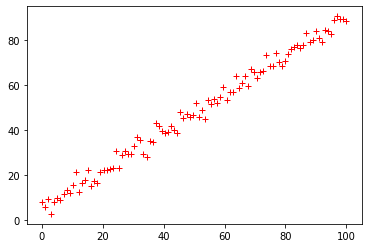

In [5]:
MiRectaConVar=RectaConVariabilidad(0.1,100,Pendiente,Intercepto,100,sigma=2.5)
plt.plot(MiRectaConVar[0],MiRectaConVar[1],'r+')

In [6]:
def Line_chi2(Obs,x,m,b):
  if len(Obs)!=len(x):
    print("Debe haber la misma cantidad de puntos observados como de x")
    return
  Chi2=((Obs-(m*x+b))**2)/(np.sqrt((m*x+b)**2))
  return sum(Chi2)

In [7]:
m_scan=np.linspace(0.1,3,100)
b_scan=np.linspace(0.1,10,100)
chi2scan=[]
for i in m_scan:
  for j in b_scan:
    chi2scan.append([i,j,Line_chi2(MiRectaConVar[1],MiRectaConVar[0],i,j)])

In [8]:
OnlyChi2=np.array(chi2scan).take(indices=2,axis=1)
MinChi2=OnlyChi2.min()
ArgMinChi2=OnlyChi2.argmin()
print(MinChi2,ArgMinChi2)

25.039149314664105 2559


In [9]:
bestm=np.array(chi2scan).take(indices=0,axis=1)[ArgMinChi2]
bestb=np.array(chi2scan).take(indices=1,axis=1)[ArgMinChi2]
print(bestm,bestb)

0.8323232323232322 6.0


## Ejercicio 1

Utilice el ejemplo para encontrar el intercepto y la pendiente tilizando las siguientes definiciones:

1. $\chi^{2}=\sum_{i=1}^{n}\frac{(N_{i}-\nu_{i})^{2}}{\nu_{i}^{2}}$
2. $\chi^{2}=\sum_{i=1}^{n}\frac{(N_{i}-\nu_{i})^{2}}{N_{i}^{2}}$
3. $\chi^{2}=\sum_{i=1}^{n}\frac{(N_{i}-\nu_{i})^{2}}{\sigma^{2}}$ con $\sigma=(x_{max}-x_{min})/n$

## Algunos posibles errores

Dispersión en x: $\sigma_{x}=(x_{max}-x_{min})/n$

Dispersión en y: $\sigma_{y}=(1/n)\sum_{i=i}^{n}|y_{i}-(\hat{m}x_{i}+\hat{b})|$

Covarianza: $\sigma_{xy}=(1/n)\sum_{i=i}^{n}|(y_{i}+\sigma_{y})-(\hat{m}(x_{i}+\sigma_{x})+\hat{b})|$

Error sobre estimadores: $\sigma_{m}\propto\sigma_{xy}$ y $\sigma_{b}\propto\sigma_{y}$

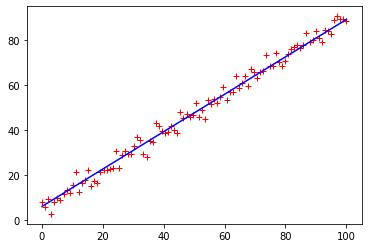

In [11]:
BestFit=bestm*MiRectaConVar[0]+bestb
plt.plot(MiRectaConVar[0],MiRectaConVar[1],'r+')
plt.plot(MiRectaConVar[0],BestFit,'b')

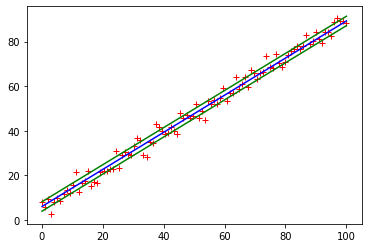

In [14]:
sigma_y=sum(np.abs(MiRectaConVar[1]-BestFit))/len(BestFit)
plt.plot(MiRectaConVar[0],MiRectaConVar[1],'r+')
plt.plot(MiRectaConVar[0],BestFit,'b')
plt.plot(MiRectaConVar[0],BestFit+sigma_y,'g')
plt.plot(MiRectaConVar[0],BestFit-sigma_y,'g')

## Método aleatorio de estimación de error sobre los estimadores

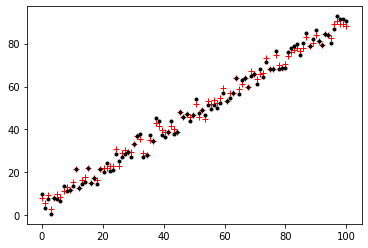

In [25]:
RectaVariada=MiRectaConVar[1]+(np.multiply(sigma_y,np.random.randint(-1,2,len(MiRectaConVar[1]))))
plt.plot(MiRectaConVar[0],MiRectaConVar[1],'r+')
plt.plot(MiRectaConVar[0],RectaVariada,'k.')

In [26]:
chi2scanvar=[]
for i in m_scan:
  for j in b_scan:
    chi2scanvar.append([i,j,Line_chi2(RectaVariada,MiRectaConVar[0],i,j)])
OnlyChi2Var=np.array(chi2scanvar).take(indices=2,axis=1)
MinChi2Var=OnlyChi2Var.min()
ArgMinChi2Var=OnlyChi2Var.argmin()
print(MinChi2Var,ArgMinChi2Var)
bestmvar=np.array(chi2scanvar).take(indices=0,axis=1)[ArgMinChi2Var]
bestbvar=np.array(chi2scanvar).take(indices=1,axis=1)[ArgMinChi2Var]
print(bestmvar,bestbvar)
print(abs(bestmvar-bestm),abs(bestbvar-bestb))

41.09604559957364 2647
0.8616161616161615 4.8
0.02929292929292926 1.2000000000000002


## Ejercicio 2

Siguiendo el mismo ejemplo estime los errores para las definiciones alternativas del $\chi_{2}$ del ejercicio 1 y compárelos con los obtenidos en la celda anterior.

## Ejercicio 3
Estime el error en los estimadores como:

$\sigma_{b}$ como el máximo de variar por un $\sigma_{y}$ el ajuste ideal.

$\sigma_{m}$ como el máximo de variar punto a punto simultáneamente $\sigma_{x}$ y $\sigma_{y}$.

## Ejercicio 4

Determine $\sigma_{m}$ y $\sigma_{b}$ como el máximo cambio en los estimadores con la mínima variación en $\chi_{2}$ desde el mínimo. Compare con los resultados obtenidos en el ejemplo y en el ejercicio 3.


## Ajuste con función de verosimilitud

Defina:
$$L(m,b)=\prod_{i=1}^{n}\frac{1}{\sqrt{2\pi\sigma_{x}^{2}}}e^{-\frac{(y_{i}-(mx_{i}+b))^{2}}{2\sigma_{x}^{2}}}$$



## Ejercicio 5:
Utilice la definición de la función de verosimilitud para encontrar la pendiente y el intercepto que mejor se ajusten a los datos. Compare sus resultados con los obtenidos mediante el método de $\chi_{2}$. ¿Son los resultados compatibles? Para responder debe comparar dentro de los errores asociados a los estimadores.